In [41]:
import os
import random
import importlib
from sys import maxsize
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from utils.filerw import readdat
import utils.efcalcs as efcalcs
# import ef_percent

In [2]:
importlib.reload(efcalcs)

<module 'utils.efcalcs' from '/home/shail/work/UIC/ef-alloc-experiments/utils/efcalcs.py'>

100 per file * 10 files

In [3]:
dir_u_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r10_u2/"
dir_uv_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r10_u2/"

dir_u_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r4_u2/"
dir_uv_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r4_u2/"

dir_u_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r6_u2/"
dir_uv_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r6_u2/"

dir_uv_r6_u4 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r6_u4/"

dir_u_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_u_r8_u2/"
dir_uv_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_uv_r8_u2/"

dir_u = [dir_u_r10_u2, dir_u_r8_u2, dir_u_r6_u2, dir_u_r4_u2]
dir_uv = [dir_uv_r10_u2, dir_uv_r8_u2, dir_uv_r6_u2, dir_uv_r4_u2]

In [35]:
dir_us1_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r10_u2/"
dir_us2_r10_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r10_u2/"

dir_us1_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r8_u2/"
dir_us2_r8_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r8_u2/"

dir_us1_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r6_u2/"
dir_us2_r6_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r6_u2/"

dir_us1_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us1_r4_u2/"
dir_us2_r4_u2 = "/home/shail/work/UIC/ef-alloc-experiments/nash_allocs_random_us2_r4_u2/"

dir_us1 = [dir_us1_r10_u2, dir_us1_r8_u2, dir_us1_r6_u2, dir_us1_r4_u2]
dir_us2 = [dir_us2_r10_u2, dir_us2_r8_u2, dir_us2_r6_u2, dir_us2_r4_u2]

In [4]:
# failtemp = np.argwhere(ef1_map==False)[0][0]
# print(failtemp)
# print(Us[failtemp])
# print(Vs[failtemp])
# print(As[failtemp])
# print(envymap1[failtemp])

In [5]:
def getseries(data, key):
    series = []
    for i in range(len(data)):
        ef_proc = efcalcs.ef_percent(data[i])
        series.append(ef_proc[key])
    return np.array(series)
   
def plotseries(series):
    plt.figure(random.randint(0, 100))
    plt.xticks(range(0, len(series), 1))
    plt.plot(range(0, len(series), 1), series, 'b-')
    plt.show()

def plotmatseries(series):
    plt.figure(random.randint(0, 100))
    plt.xticks(range(0, len(series), 1))
    for i in range(series.shape[1]):
        for j in range(series.shape[2]):
            plt.plot(range(0, len(series[:, i, j]), 1), series[:, i, j], '-')
    plt.show()

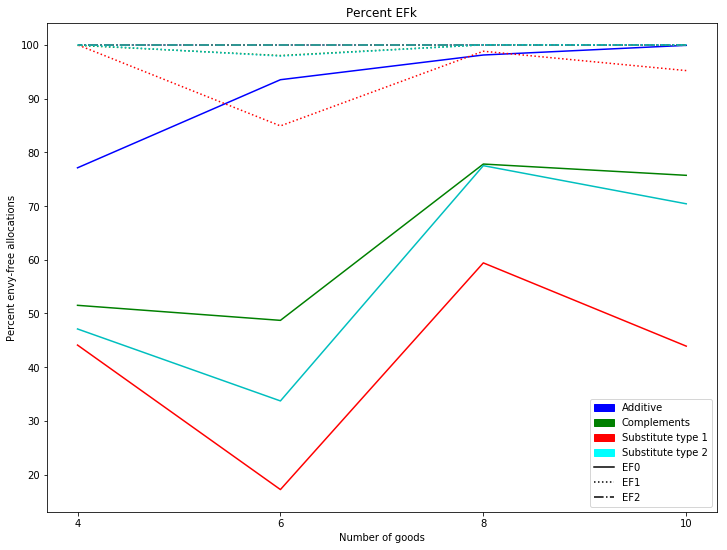

In [50]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
yticks = np.array(range(0, 101, 10))
plt.xticks(xticks)
plt.yticks(yticks)

plt.plot(xticks, getseries(dir_u, "ef0_percent"), 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_percent"), 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_percent"), 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_percent"), 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_percent"), 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_percent"), 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_percent"), 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_percent"), 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_percent"), 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_percent"), 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_percent"), 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_percent"), 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='EF0')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='EF1')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='EF2')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Percent EFk')
plt.xlabel('Number of goods')
plt.ylabel('Percent envy-free allocations')
plt.show()

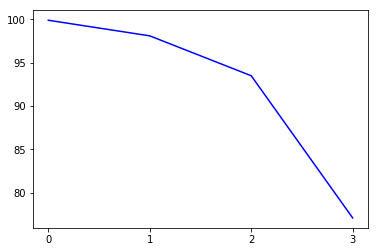

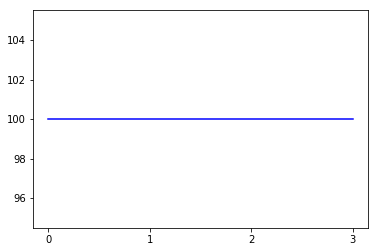

In [6]:
plotseries(getseries(dir_u, "ef0_percent"))
plotseries(getseries(dir_u, "ef1_percent"))

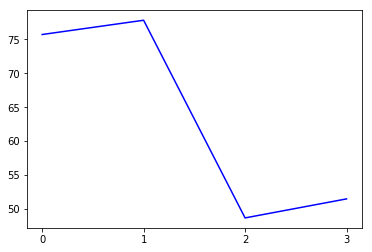

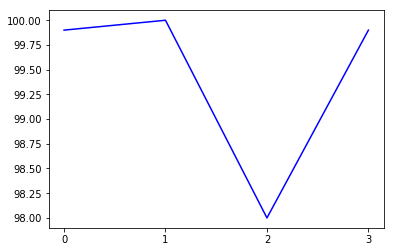

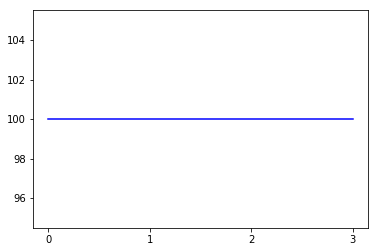

In [7]:
plotseries(getseries(dir_uv, "ef0_percent"))
plotseries(getseries(dir_uv, "ef1_percent"))
plotseries(getseries(dir_uv, "ef2_percent"))

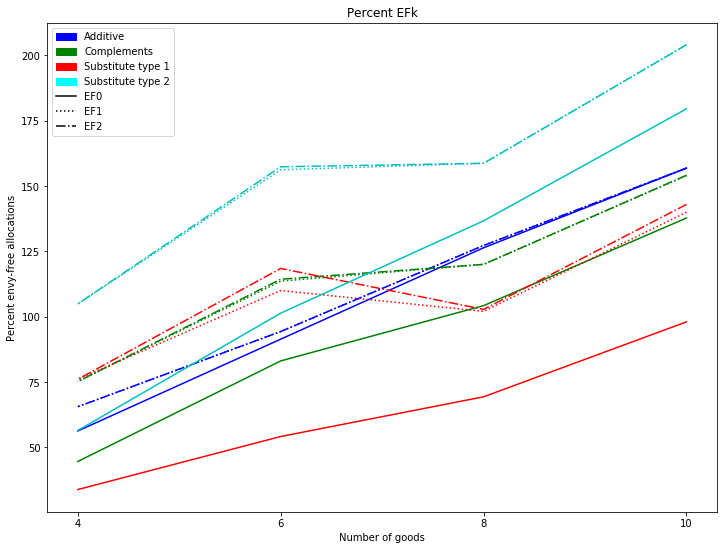

In [58]:
plt.figure(random.randint(0, 100), figsize=(12,9))
xticks = np.array([10, 8, 6, 4])
plt.xticks(xticks)

plt.plot(xticks, getseries(dir_u, "ef0_means")[:,0,1], 'b-')
plt.plot(xticks, getseries(dir_u, "ef1_means")[:,0,1], 'b:')
plt.plot(xticks, getseries(dir_u, "ef2_means")[:,0,1], 'b-.')
plt.plot(xticks, getseries(dir_uv, "ef0_means")[:,0,1], 'g-')
plt.plot(xticks, getseries(dir_uv, "ef1_means")[:,0,1], 'g:')
plt.plot(xticks, getseries(dir_uv, "ef2_means")[:,0,1], 'g-.')
plt.plot(xticks, getseries(dir_us1, "ef0_means")[:,0,1], 'r-')
plt.plot(xticks, getseries(dir_us1, "ef1_means")[:,0,1], 'r:')
plt.plot(xticks, getseries(dir_us1, "ef2_means")[:,0,1], 'r-.')
plt.plot(xticks, getseries(dir_us2, "ef0_means")[:,0,1], 'c-')
plt.plot(xticks, getseries(dir_us2, "ef1_means")[:,0,1], 'c:')
plt.plot(xticks, getseries(dir_us2, "ef2_means")[:,0,1], 'c-.')

add_patch = mpatches.Patch(color='blue', label='Additive')
comp_patch = mpatches.Patch(color='green', label='Complements')
sub1_patch = mpatches.Patch(color='red', label='Substitute type 1')
sub2_patch = mpatches.Patch(color='cyan', label='Substitute type 2')
ef0_line = mlines.Line2D([], [], color='black', linestyle='-', label='EF0')
ef1_line = mlines.Line2D([], [], color='black', linestyle=':', label='EF1')
ef2_line = mlines.Line2D([], [], color='black', linestyle='-.', label='EF2')
plt.legend(handles=[add_patch, comp_patch, sub1_patch, sub2_patch, ef0_line, ef1_line, ef2_line], loc='best')

plt.title('Percent EFk')
plt.xlabel('Number of goods')
plt.ylabel('Percent envy-free allocations')
plt.show()

[[[  0.         156.83334623]
  [155.02036867   0.        ]]

 [[  0.         126.33334216]
  [122.9806306    0.        ]]

 [[  0.          91.35345389]
  [ 88.96794779   0.        ]]

 [[  0.          56.20214644]
  [ 56.41082445   0.        ]]]


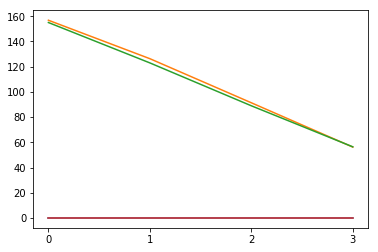

[[[  0.         156.83334623]
  [155.11827364   0.        ]]

 [[  0.         127.21740552]
  [123.58211117   0.        ]]

 [[  0.          94.27388561]
  [ 91.05224569   0.        ]]

 [[  0.          65.47889405]
  [ 64.33766935   0.        ]]]


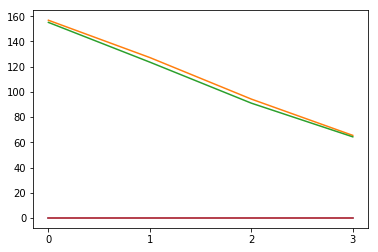

[[[  0.         156.83334623]
  [155.11827364   0.        ]]

 [[  0.         127.21740552]
  [123.58211117   0.        ]]

 [[  0.          94.27388561]
  [ 91.05224569   0.        ]]

 [[  0.          65.47889405]
  [ 64.33766935   0.        ]]]


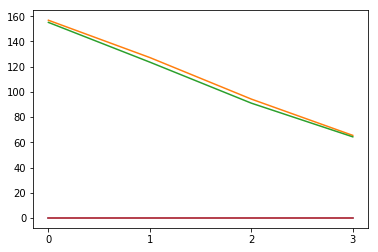

In [8]:
series = getseries(dir_u, "ef0_means")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef1_means")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef2_means")
print(series)
plotmatseries(series)

[[[  0.         156.83334623]
  [155.02114089   0.        ]]

 [[  0.         126.48942761]
  [123.09040063   0.        ]]

 [[  0.          91.77398598]
  [ 89.44611016   0.        ]]

 [[  0.          58.45416904]
  [ 58.44216028   0.        ]]]


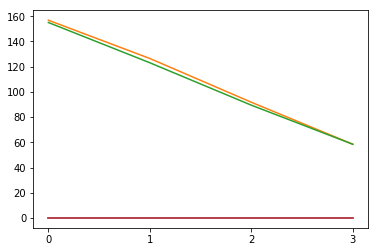

[[[  0.         156.83334623]
  [155.11827364   0.        ]]

 [[  0.         127.21740552]
  [123.58211117   0.        ]]

 [[  0.          94.27388561]
  [ 91.05224569   0.        ]]

 [[  0.          65.47889405]
  [ 64.33766935   0.        ]]]


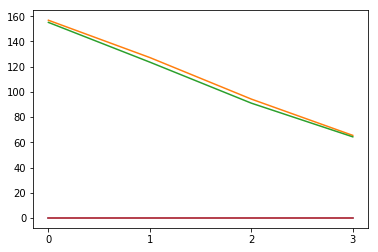

[[[  0.         156.83334623]
  [155.11827364   0.        ]]

 [[  0.         127.21740552]
  [123.58211117   0.        ]]

 [[  0.          94.27388561]
  [ 91.05224569   0.        ]]

 [[  0.          65.47889405]
  [ 64.33766935   0.        ]]]


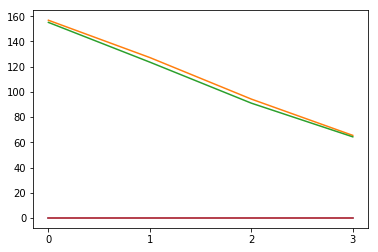

In [9]:
series = getseries(dir_u, "ef0_pos_means")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef1_pos_means")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef2_pos_means")
print(series)
plotmatseries(series)

[[[ 0.00000000e+00  0.00000000e+00]
  [-7.72227234e-04  0.00000000e+00]]

 [[ 0.00000000e+00 -1.56085448e-01]
  [-1.09770033e-01  0.00000000e+00]]

 [[ 0.00000000e+00 -4.20532093e-01]
  [-4.78162368e-01  0.00000000e+00]]

 [[ 0.00000000e+00 -2.25202260e+00]
  [-2.03133583e+00  0.00000000e+00]]]


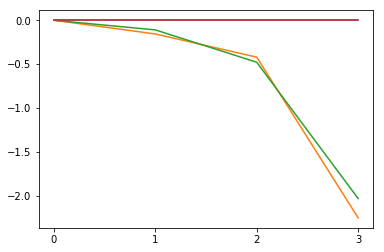

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


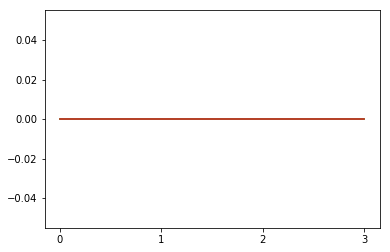

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


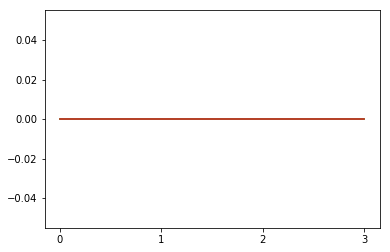

In [10]:
series = getseries(dir_u, "ef0_neg_means")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef1_neg_means")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef2_neg_means")
print(series)
plotmatseries(series)

[[[  0.         137.73304048]
  [134.82639453   0.        ]]

 [[  0.         104.18248343]
  [104.58306424   0.        ]]

 [[  0.          83.02162873]
  [ 74.47077309   0.        ]]

 [[  0.          44.52326596]
  [ 41.32370711   0.        ]]]


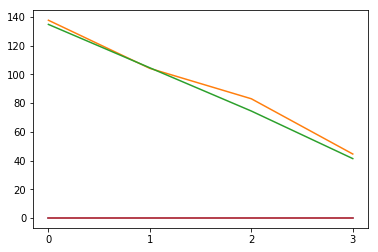

[[[  0.         153.9664558 ]
  [152.27546644   0.        ]]

 [[  0.         119.98533569]
  [120.19430845   0.        ]]

 [[  0.         113.55231673]
  [107.61388393   0.        ]]

 [[  0.          75.12509966]
  [ 74.61377435   0.        ]]]


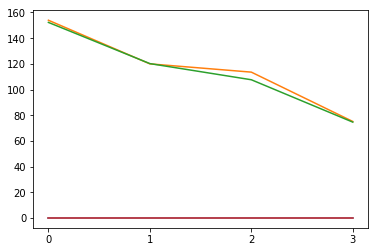

[[[  0.         154.10125936]
  [152.27546644   0.        ]]

 [[  0.         119.98533569]
  [120.19430845   0.        ]]

 [[  0.         114.2853773 ]
  [109.0396012    0.        ]]

 [[  0.          75.12509966]
  [ 74.67106896   0.        ]]]


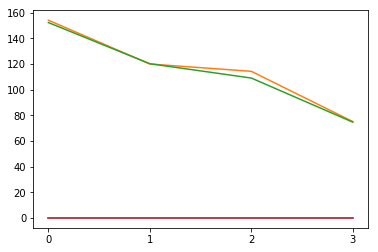

In [11]:
series = getseries(dir_uv, "ef0_means")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef1_means")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef2_means")
print(series)
plotmatseries(series)

[[[  0.         142.92624834]
  [140.11198442   0.        ]]

 [[  0.         107.76165509]
  [108.48607588   0.        ]]

 [[  0.          96.76593419]
  [ 90.96291689   0.        ]]

 [[  0.          53.08134235]
  [ 49.65425577   0.        ]]]


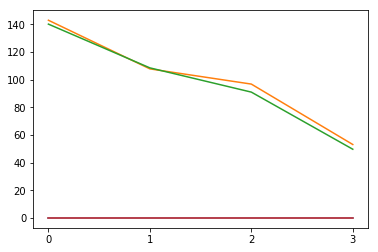

[[[  0.         153.99764655]
  [152.27546644   0.        ]]

 [[  0.         119.98533569]
  [120.19430845   0.        ]]

 [[  0.         113.64229644]
  [107.8225121    0.        ]]

 [[  0.          75.12509966]
  [ 74.61517849   0.        ]]]


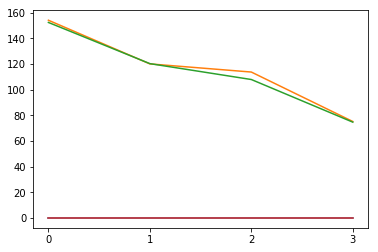

[[[  0.         154.10125936]
  [152.27546644   0.        ]]

 [[  0.         119.98533569]
  [120.19430845   0.        ]]

 [[  0.         114.2853773 ]
  [109.0396012    0.        ]]

 [[  0.          75.12509966]
  [ 74.67106896   0.        ]]]


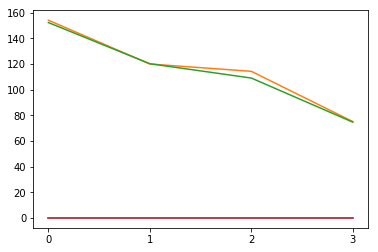

In [12]:
series = getseries(dir_uv, "ef0_pos_means")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef1_pos_means")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef2_pos_means")
print(series)
plotmatseries(series)

[[[  0.          -5.19320787]
  [ -5.2855899    0.        ]]

 [[  0.          -3.57917165]
  [ -3.90301165   0.        ]]

 [[  0.         -13.74430546]
  [-16.4921438    0.        ]]

 [[  0.          -8.55807639]
  [ -8.33054866   0.        ]]]


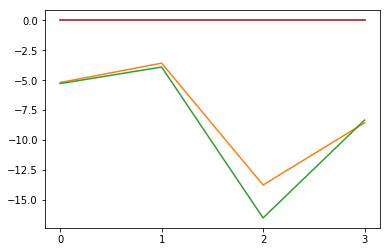

[[[ 0.         -0.03119075]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.         -0.08997971]
  [-0.20862817  0.        ]]

 [[ 0.          0.        ]
  [-0.00140414  0.        ]]]


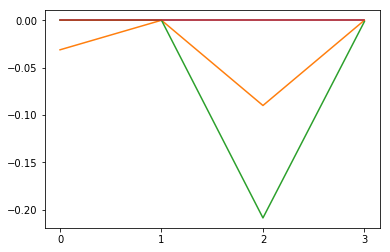

[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


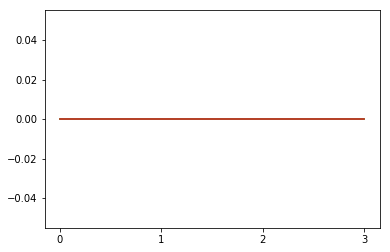

In [13]:
series = getseries(dir_uv, "ef0_neg_means")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef1_neg_means")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef2_neg_means")
print(series)
plotmatseries(series)

[[[ 0.         68.37707329]
  [65.3157873   0.        ]]

 [[ 0.         64.1111858 ]
  [62.878994    0.        ]]

 [[ 0.         55.49371266]
  [53.04071767  0.        ]]

 [[ 0.         47.97520014]
  [45.98858705  0.        ]]]


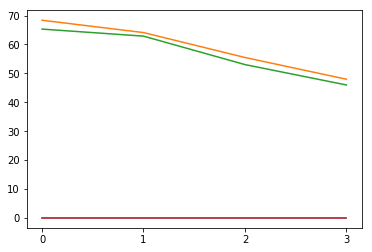

[[[ 0.         68.37707329]
  [65.15536916  0.        ]]

 [[ 0.         62.71469491]
  [61.93159327  0.        ]]

 [[ 0.         52.00652743]
  [50.2832711   0.        ]]

 [[ 0.         39.40358954]
  [38.34352994  0.        ]]]


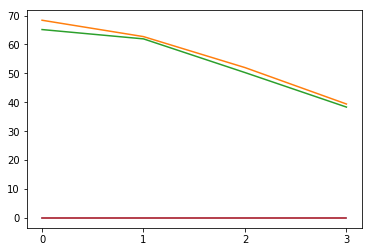

[[[ 0.         68.37707329]
  [65.15536916  0.        ]]

 [[ 0.         62.71469491]
  [61.93159327  0.        ]]

 [[ 0.         52.00652743]
  [50.2832711   0.        ]]

 [[ 0.         39.40358954]
  [38.34352994  0.        ]]]


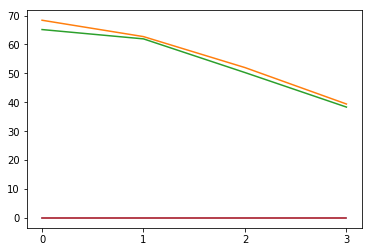

In [14]:
series = getseries(dir_u, "ef0_stds")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef1_stds")
print(series)
plotmatseries(series)
series = getseries(dir_u, "ef2_stds")
print(series)
plotmatseries(series)

[[[  0.         113.72814897]
  [110.42648228   0.        ]]

 [[  0.          88.75492692]
  [ 87.87904888   0.        ]]

 [[  0.         107.64191776]
  [109.58075385   0.        ]]

 [[  0.          62.65301931]
  [ 59.70746581   0.        ]]]


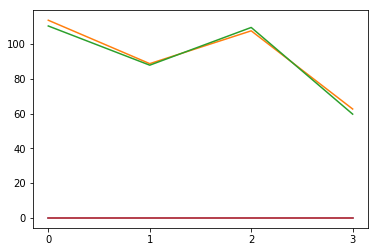

[[[ 0.         94.89523649]
  [90.41461064  0.        ]]

 [[ 0.         74.70661871]
  [73.26920199  0.        ]]

 [[ 0.         76.93305499]
  [76.92012276  0.        ]]

 [[ 0.         46.02593862]
  [44.43850919  0.        ]]]


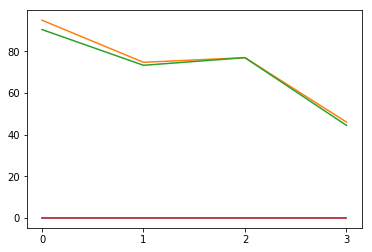

[[[ 0.         94.72771526]
  [90.41461064  0.        ]]

 [[ 0.         74.70661871]
  [73.26920199  0.        ]]

 [[ 0.         76.22673622]
  [75.6337297   0.        ]]

 [[ 0.         46.02593862]
  [44.3773552   0.        ]]]


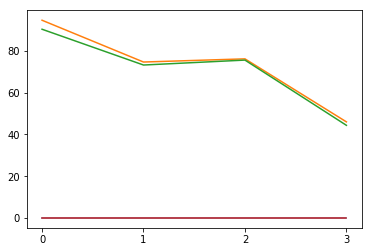

In [15]:
series = getseries(dir_uv, "ef0_stds")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef1_stds")
print(series)
plotmatseries(series)
series = getseries(dir_uv, "ef2_stds")
print(series)
plotmatseries(series)

In [16]:
for i in range(len(dir_u)):
    print(efcalcs.ef_percent(dir_u[i]))

{'ef0_percent': 99.9, 'ef1_percent': 100.0, 'ef2_percent': 100.0, 'ef0_means': array([[  0.        , 156.83334623],
       [155.02036867,   0.        ]]), 'ef1_means': array([[  0.        , 156.83334623],
       [155.11827364,   0.        ]]), 'ef2_means': array([[  0.        , 156.83334623],
       [155.11827364,   0.        ]]), 'ef0_pos_means': array([[  0.        , 156.83334623],
       [155.02114089,   0.        ]]), 'ef1_pos_means': array([[  0.        , 156.83334623],
       [155.11827364,   0.        ]]), 'ef2_pos_means': array([[  0.        , 156.83334623],
       [155.11827364,   0.        ]]), 'ef0_neg_means': array([[ 0.        ,  0.        ],
       [-0.00077223,  0.        ]]), 'ef1_neg_means': array([[0., 0.],
       [0., 0.]]), 'ef2_neg_means': array([[0., 0.],
       [0., 0.]]), 'ef0_stds': array([[ 0.        , 68.37707329],
       [65.3157873 ,  0.        ]]), 'ef1_stds': array([[ 0.        , 68.37707329],
       [65.15536916,  0.        ]]), 'ef2_stds': array([[ 0.  

In [17]:
for i in range(len(dir_uv)):
    print(efcalcs.ef_percent(dir_uv[i]))

{'ef0_percent': 75.7, 'ef1_percent': 99.9, 'ef2_percent': 100.0, 'ef0_means': array([[  0.        , 137.73304048],
       [134.82639453,   0.        ]]), 'ef1_means': array([[  0.        , 153.9664558 ],
       [152.27546644,   0.        ]]), 'ef2_means': array([[  0.        , 154.10125936],
       [152.27546644,   0.        ]]), 'ef0_pos_means': array([[  0.        , 142.92624834],
       [140.11198442,   0.        ]]), 'ef1_pos_means': array([[  0.        , 153.99764655],
       [152.27546644,   0.        ]]), 'ef2_pos_means': array([[  0.        , 154.10125936],
       [152.27546644,   0.        ]]), 'ef0_neg_means': array([[ 0.        , -5.19320787],
       [-5.2855899 ,  0.        ]]), 'ef1_neg_means': array([[ 0.        , -0.03119075],
       [ 0.        ,  0.        ]]), 'ef2_neg_means': array([[0., 0.],
       [0., 0.]]), 'ef0_stds': array([[  0.        , 113.72814897],
       [110.42648228,   0.        ]]), 'ef1_stds': array([[ 0.        , 94.89523649],
       [90.41461064,  0

<Figure size 432x288 with 0 Axes>

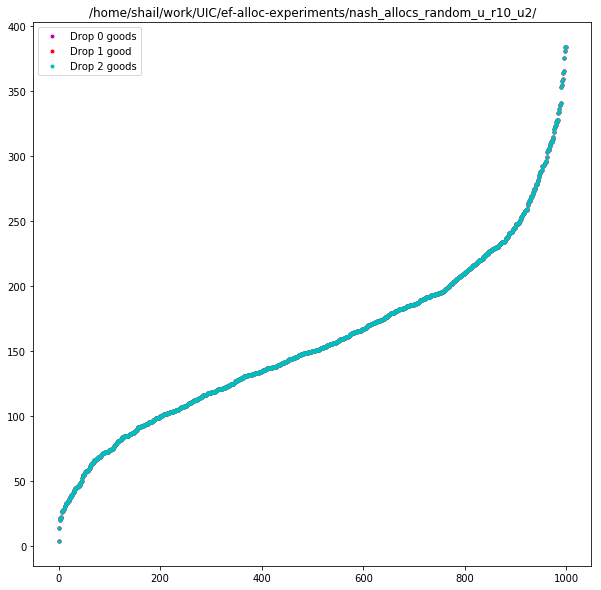

<Figure size 432x288 with 0 Axes>

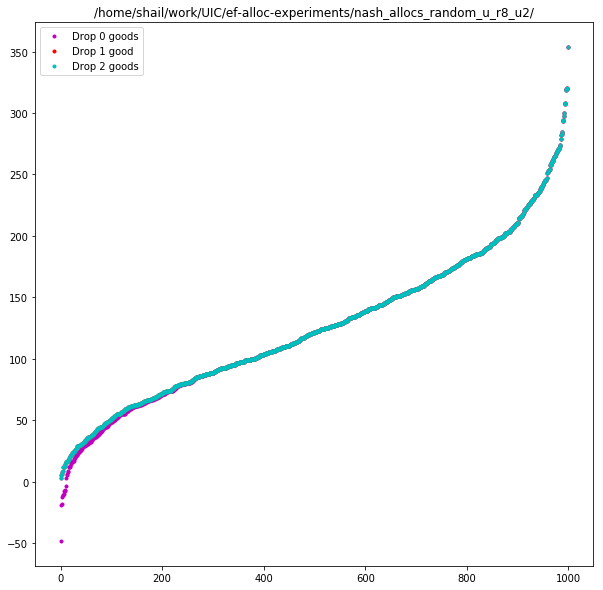

<Figure size 432x288 with 0 Axes>

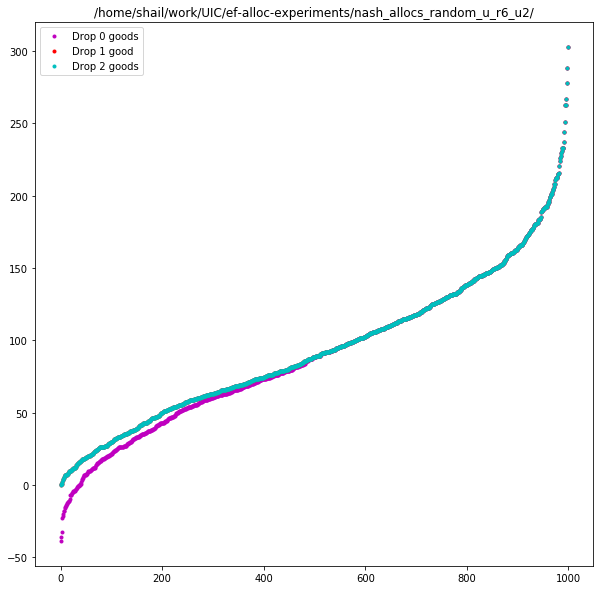

<Figure size 432x288 with 0 Axes>

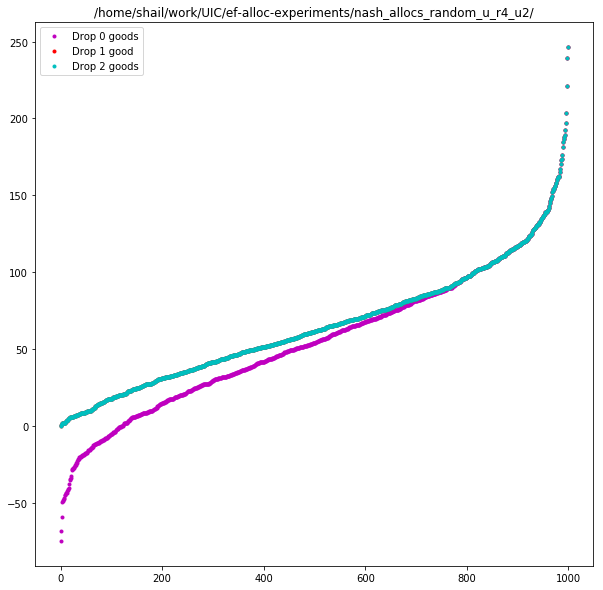

<Figure size 432x288 with 0 Axes>

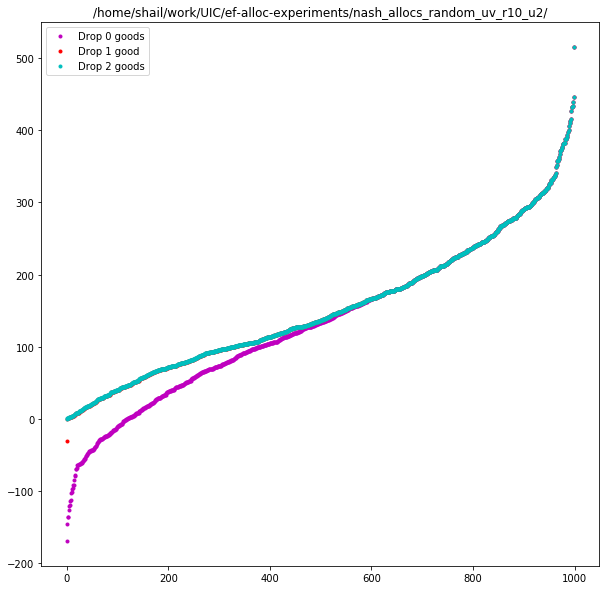

<Figure size 432x288 with 0 Axes>

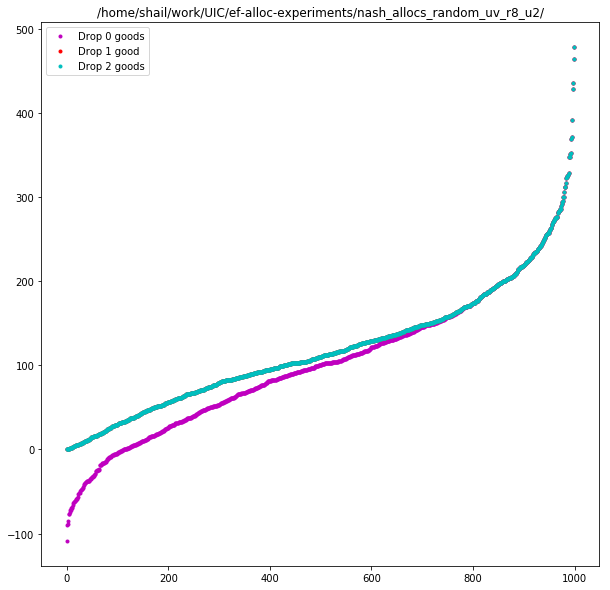

<Figure size 432x288 with 0 Axes>

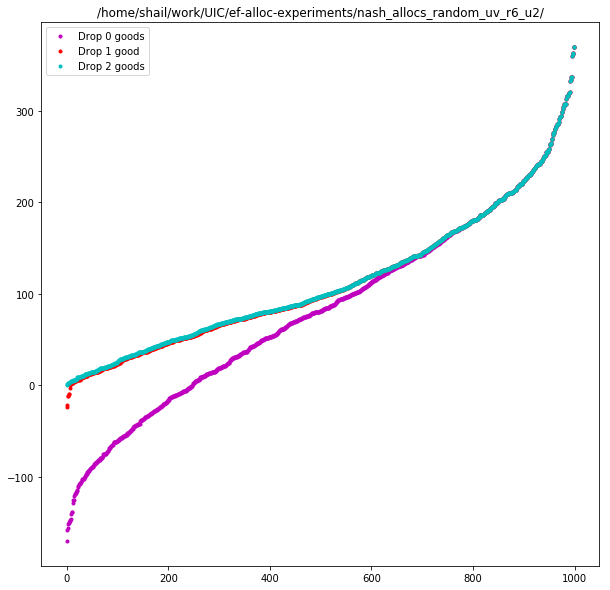

<Figure size 432x288 with 0 Axes>

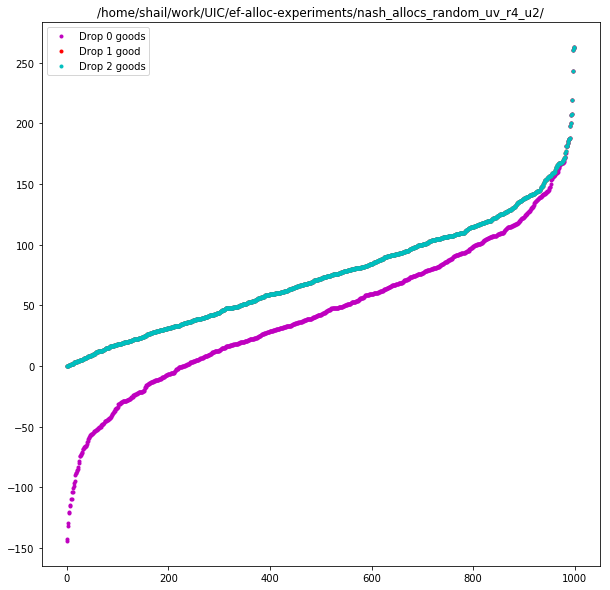

<Figure size 432x288 with 0 Axes>

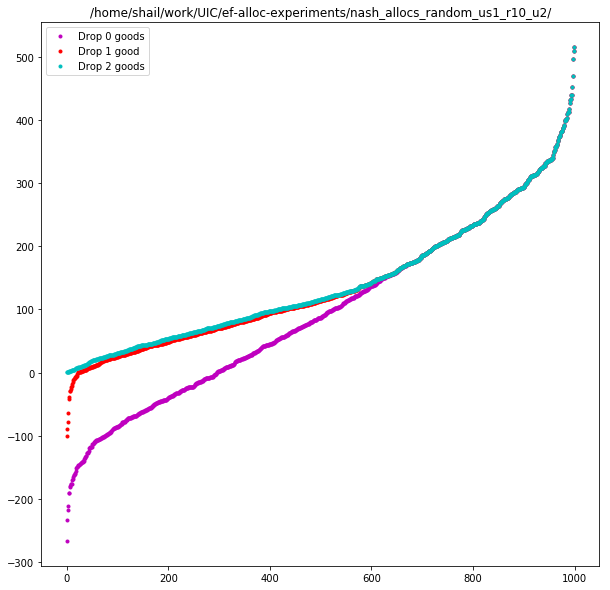

<Figure size 432x288 with 0 Axes>

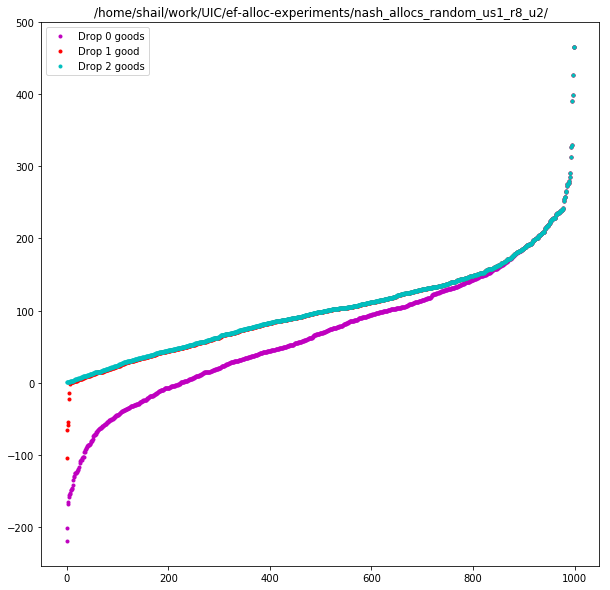

<Figure size 432x288 with 0 Axes>

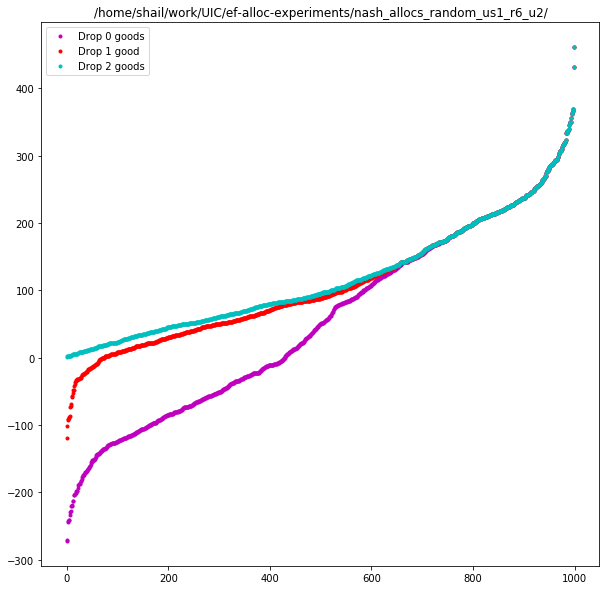

<Figure size 432x288 with 0 Axes>

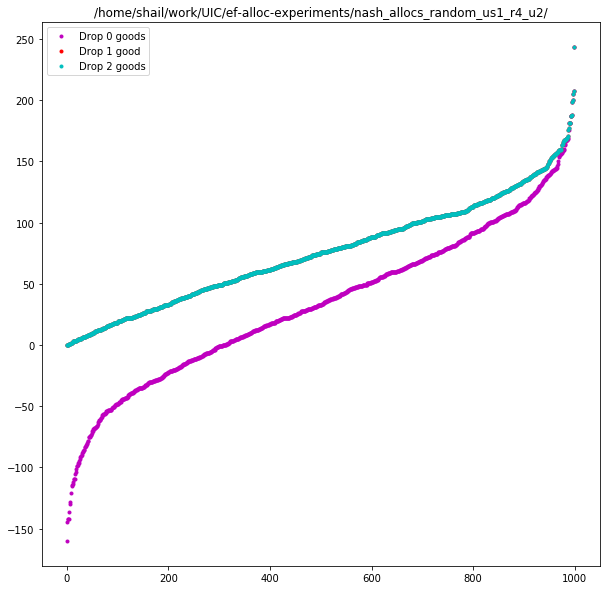

<Figure size 432x288 with 0 Axes>

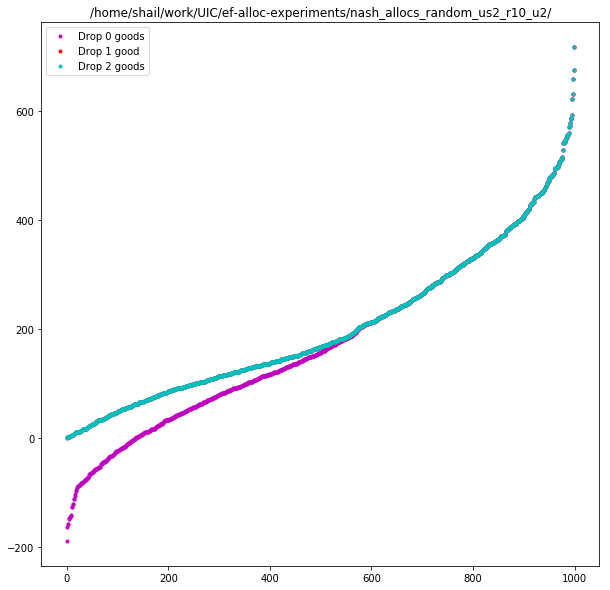

<Figure size 432x288 with 0 Axes>

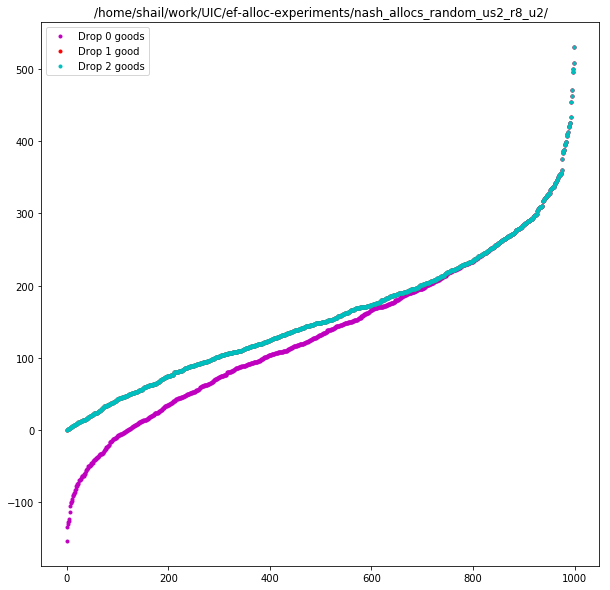

<Figure size 432x288 with 0 Axes>

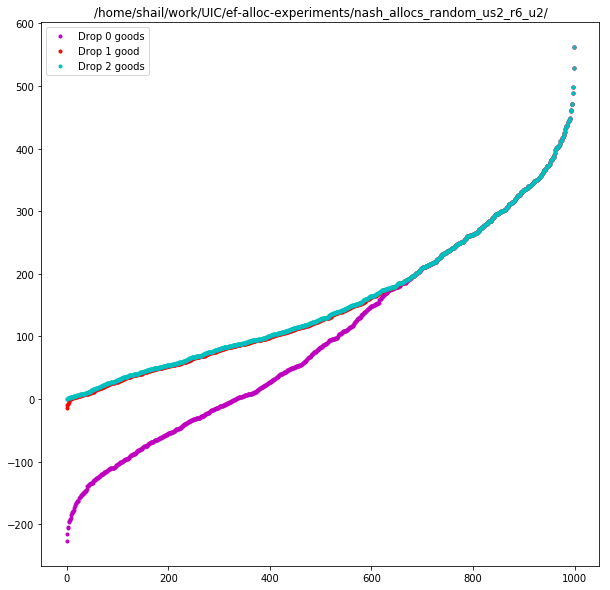

<Figure size 432x288 with 0 Axes>

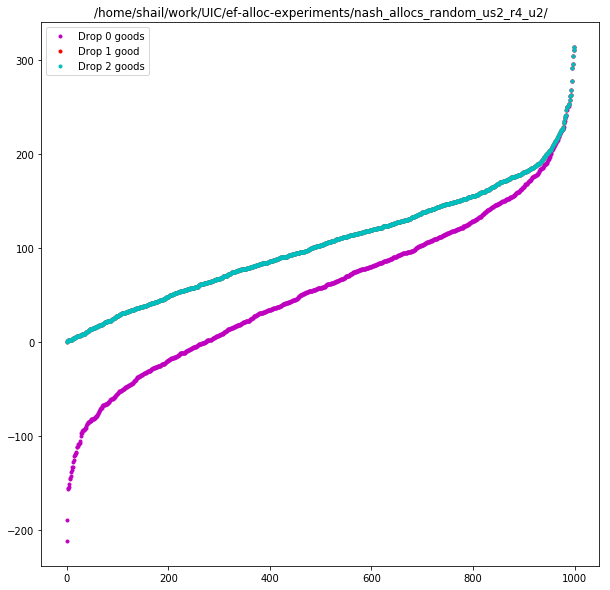

In [66]:
for f in dir_u + dir_uv:
    Us, Vs, As = readdat(f)
    Us = np.array(Us)
    Vs = np.array(Vs)
    As = np.array(As)

    envy_map = [[], []]
    envy1_map = [[], []]
    envy2_map = [[], []]

    for i in range(len(As)):
        e0 = efcalcs.envyMap(efcalcs.complementing_utility, As[i], Us[i], Vs[i])
        e1 = efcalcs.envyMap_upto1(efcalcs.complementing_utility, As[i], Us[i], Vs[i])
        e2 = efcalcs.envyMap_upto2(efcalcs.complementing_utility, As[i], Us[i], Vs[i])
        envy_map[0].append(e0[0][1])
        envy_map[1].append(e0[1][0])
        envy1_map[0].append(e1[0][1])
        envy1_map[1].append(e1[1][0])
        envy2_map[0].append(e2[0][1])
        envy2_map[1].append(e2[1][0])

    envy_map = np.array(envy_map)
    envy1_map = np.array(envy1_map)
    envy2_map = np.array(envy2_map)
    
    envy_zip = np.vstack((envy_map[0], envy1_map[0], envy2_map[0]))
    envy_zip = envy_zip.T[envy_zip[0,:].argsort()]
    envy_zip = envy_zip.T

    envy_map[0].sort()
#     envy_map[1].sort()
    envy1_map[0].sort()
#     envy1_map[1].sort()
    envy2_map[0].sort()
#     envy2_map[1].sort()
    
    plt.figure(51)
    plt.figure(figsize=(10, 10))
#     plt.plot(range(0, len(envy_zip[0, :]), 1), envy_zip[0, :], 'b.', label="e0[0]")
    plt.plot(range(0, len(envy_map[0, :]), 1), envy_map[0, :], 'm.', label="e0[0] ss")
    # plt.plot(range(0, len(envy_map[1, 0:500]), 1), envy_map[1, 0:500], 'ro', label="e0[1]")

#     plt.plot(range(0, len(envy_zip[1, :]), 1), envy_zip[1, :], 'r.', label="e1[0]")
    plt.plot(range(0, len(envy1_map[0, :]), 1), envy1_map[0, :], 'r.', label="e1[0] ss")
    # plt.plot(range(0, len(envy1_map[1, 0:500]), 1), envy1_map[1, 0:500], 'co', label="e1[1]")

#     plt.plot(range(0, len(envy_zip[2, :]), 1), envy_zip[2, :], 'g.', label="e2[0]")
    plt.plot(range(0, len(envy2_map[0, :]), 1), envy2_map[0, :], 'c.', label="e2[0] ss")
    # plt.plot(range(0, len(envy2_map[1, 0:500]), 1), envy2_map[1, 0:500], 'yo', label="e2[1]")
    plt.title(f)
    plt.legend(loc='best')
    plt.show()